## EOF analysis of ISMR

In [3]:
"""
Compute and plot the leading EOF of sea surface temperature in the
central and northern Pacific during winter time.

The spatial pattern of this EOF is the canonical El Nino pattern, and
the associated time series shows large peaks and troughs for well-known
El Nino and La Nina events.

This example uses the metadata-retaining xarray interface.

Additional requirements for this example:

    * xarray (http://xarray.pydata.org)
    * matplotlib (http://matplotlib.org/)
    * cartopy (http://scitools.org.uk/cartopy/)

"""
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from eofs.xarray import Eof
from eofs.examples import example_data_path

from cartopy.feature import ShapelyFeature
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from scipy import stats
from scipy import signal

## SST NDJFM DATA

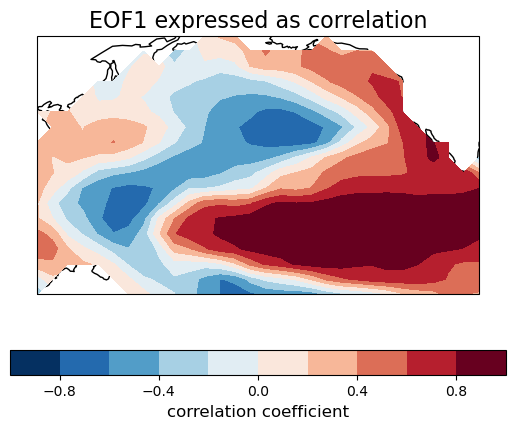

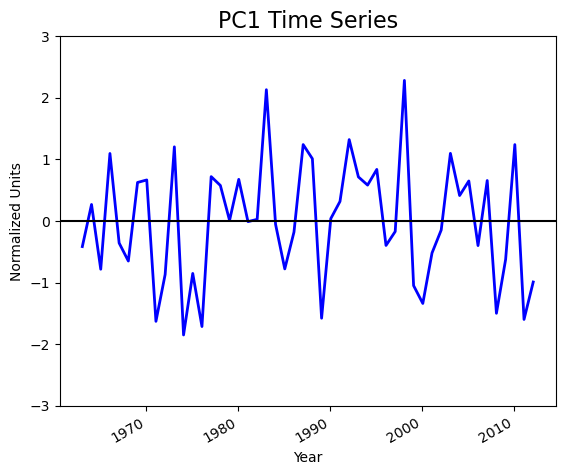

In [4]:
# Read SST anomalies using the xarray module. The file contains November-March
# averages of SST anomaly in the central and northern Pacific.

filename = example_data_path('sst_ndjfm_anom.nc')
sst = xr.open_dataset(filename)['sst']

# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.

coslat = np.cos(np.deg2rad(sst.coords['latitude'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sst, weights=wgts)

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.

eof1 = solver.eofsAsCorrelation(neofs=1)
pc1 = solver.pcs(npcs=1, pcscaling=1)

# Plot the leading EOF expressed as correlation in the Pacific domain.

clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof1[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF1 expressed as correlation', fontsize=16)

# Plot the leading PC time series.

plt.figure()
pc1[:, 0].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)

plt.show()

## ISMR DATA

In [5]:
# Read SST anomalies using the xarray module. The file contains November-March
# averages of SST anomaly in the central and northern Pacific.

filename  = '/home/cccr/roxy/athira/standardized_imd_jjas_yearly.nc'
ds        = xr.open_dataset(filename)['rf']
# rf = ds.groupby("time.month") - ds.groupby("time.month").mean("time")
rf        = ds.copy()
# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.

coslat    = np.cos(np.deg2rad(rf.coords['latitude'].values))
wgts      = np.sqrt(coslat)[..., np.newaxis]
solver    = Eof(rf, weights=wgts)

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.

eof1      = solver.eofsAsCovariance(neofs=3)
pc        = solver.pcs(npcs=3, pcscaling=1)
# eof1

In [6]:
eof1[0]=eof1[0]*-1
pc[:,0]=pc[:,0]*-1

eof1[1]=eof1[1]*-1
pc[:,1]=pc[:,1]*-1

In [7]:
variance_fractions = solver.varianceFraction(neigs=3)
print(variance_fractions)
errors = solver.northTest(neigs=3, vfscaled=True)
print(errors)


<xarray.DataArray 'variance_fractions' (mode: 3)>
array([0.15113473, 0.08484232, 0.05993665], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2
Attributes:
    long_name:  variance_fractions
<xarray.DataArray 'typical_errors' (mode: 3)>
array([0.01959322, 0.01099902, 0.00777023], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2
Attributes:
    long_name:  typical_errors


Text(0.5, 1.0, 'PC2')

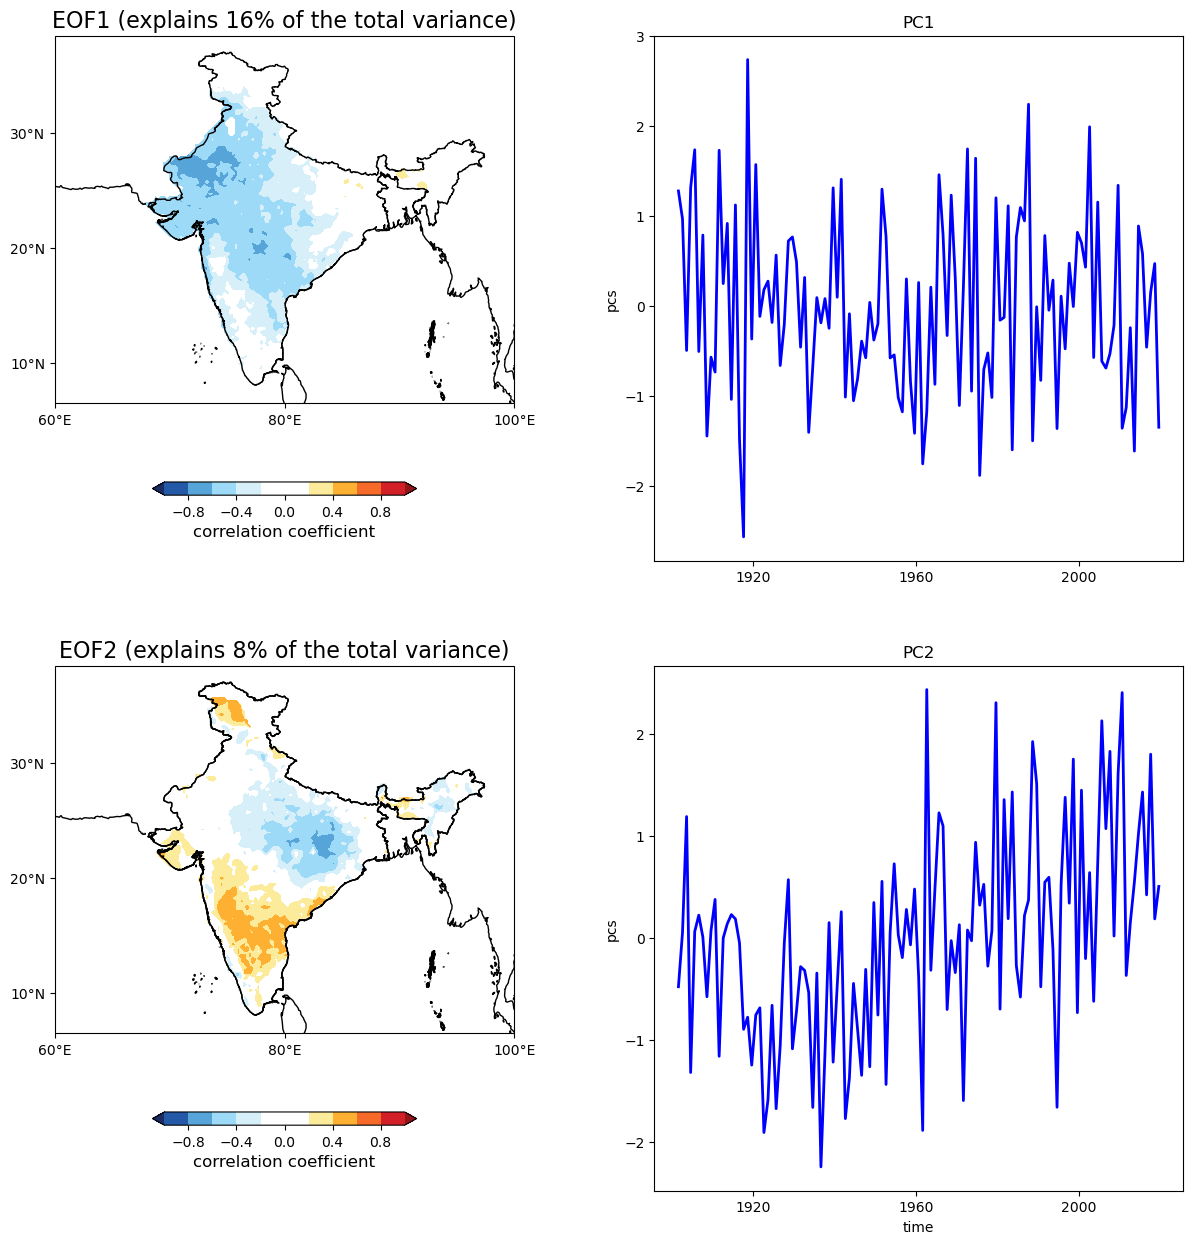

In [8]:
# Plot the leading EOF expressed as correlation in the Pacific domain.
import nclcmaps2
import matplotlib.gridspec as gridspec

cmap1= nclcmaps2.cmap('BlueWhiteOrangeRed')

fig=plt.figure(figsize=(15,15))
# G = gridspec.GridSpec(5, 5)

#############################################
ax1 = fig.add_subplot(2,2,1,projection=ccrs.PlateCarree())
clevs = np.arange(-1, 1.2,.2)
fill = eof1[0][0].plot.contourf(ax=ax1, levels=clevs, cmap=cmap1,
                             add_colorbar=False, transform=ccrs.PlateCarree(),extend='both')
ax1.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal',shrink=0.5)
cb.set_label('correlation coefficient', fontsize=12)
ax1.set_title('EOF1 (explains 16% of the total variance)', fontsize=16)
fname='/home/cccr/roxy/panini/yang/era5_yang/Shape_file/India_Country_dcml_dgr.shp'
# fname = 'new_shape/India_Boundary.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none',edgecolor='k')
ax1.add_feature(shape_feature)
ax1.set_xticks([60, 80, 100],crs=ccrs.PlateCarree())
ax1.set_yticks([10, 20, 30],crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_ylabel('')
ax1.set_xlabel('')

################################################
ax2 = fig.add_subplot(2,2,2)

pc[:, 0].plot(ax=ax2,color='b', linewidth=2)
ax2.set_title('PC1', fontsize=12)
ax2.set_xlabel('')

#######################################
ax3 = fig.add_subplot(2,2,3,projection=ccrs.PlateCarree())
clevs = np.arange(-1, 1.2,.2)

fill = eof1[1][0].plot.contourf(ax=ax3, levels=clevs, cmap=cmap1,
                             add_colorbar=False, transform=ccrs.PlateCarree(),extend='both')
ax3.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal',shrink=0.5)
cb.set_label('correlation coefficient', fontsize=12)
ax3.set_title('EOF2 (explains 8% of the total variance)', fontsize=16)
ax3.add_feature(shape_feature)

ax3.add_feature(shape_feature)
ax3.set_xticks([60, 80, 100],crs=ccrs.PlateCarree())
ax3.set_yticks([10, 20, 30],crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
ax3.set_ylabel('')
ax3.set_xlabel('')
################################################
ax4 = fig.add_subplot(2,2,4)

pc[:, 1].plot(ax=ax4,color='b', linewidth=2)
ax4.set_title('PC2', fontsize=12)

In [9]:
# %store  pc
%store eof1

Stored 'eof1' (DataArray)


In [10]:
!rm /home/cccr/roxy/athira/pc.yearmean.nc
pc.to_netcdf('/home/cccr/roxy/athira/pc.yearmean.nc')
# !cdo yearmean pcs.nc pc.yearmean.nc

## PC1 and PC2 running correlation

In [11]:
pc   = xr.open_dataset('/home/cccr/roxy/athira/pc.yearmean.nc')
pc1  = pc.sel(mode=0)['pcs'].values[:-1]
pc2  = pc.sel(mode=1)['pcs'].values[:-1]
pc3  = pc.sel(mode=2)['pcs'].values[:-1]

Text(0.5, 0, 'Year')

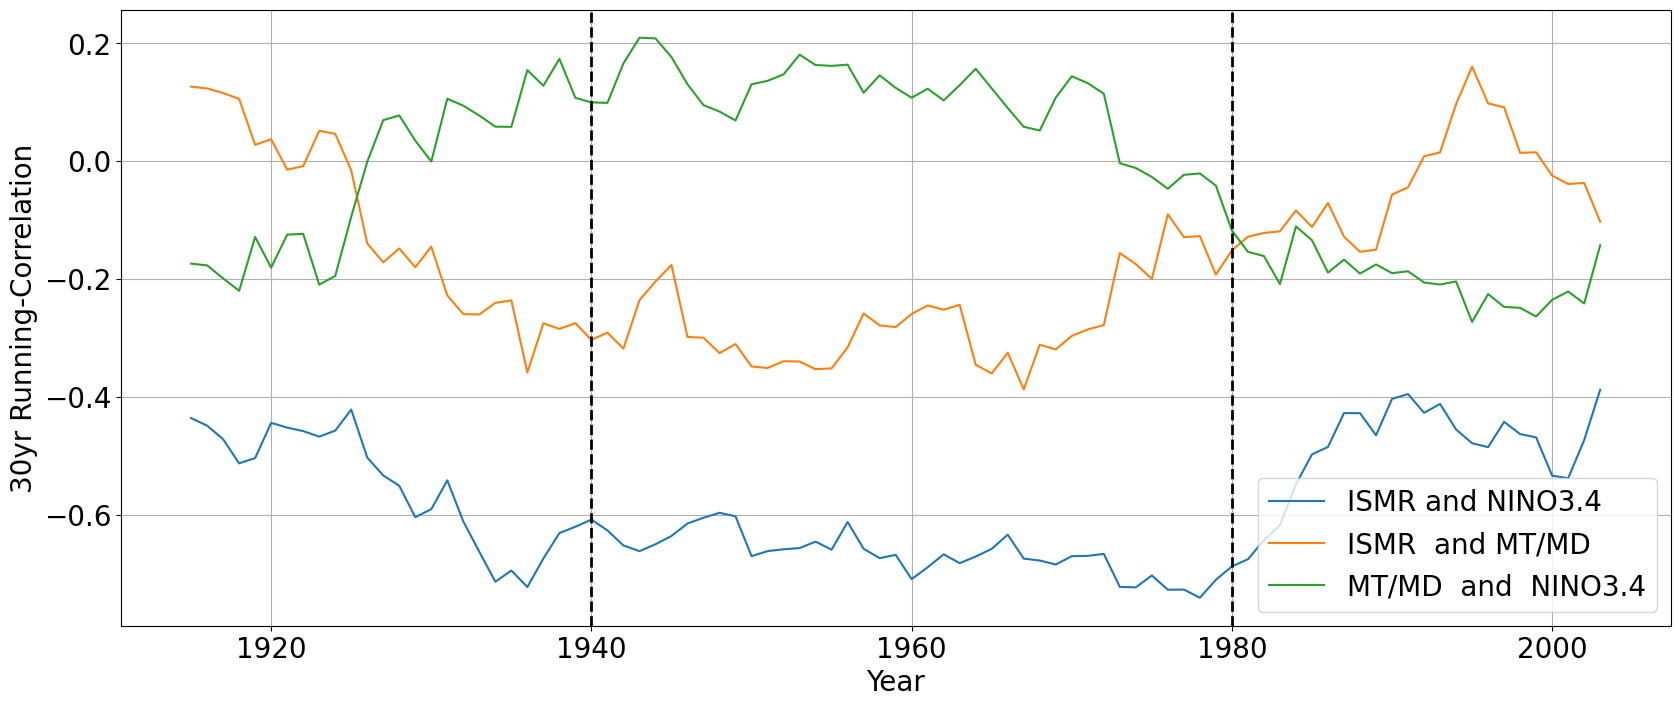

In [12]:
pc1   = signal.detrend(pc1)
pc2   = signal.detrend(pc2)
data1 = "/home/cccr/roxy/athira/fldmeanimd.nc"
data  = "/home/cccr/roxy/athira/sstfld.nc"
a     = xr.open_dataset(data1)
b     = xr.open_dataset(data)
sst1  = b.sst.sel(time=slice('1901-06-01','2018-09-30'))
nino34=signal.detrend(sst1.squeeze())
rain1 = a.rf.sel(time=slice('1901-06-01','2018-09-30'))
rain_all_india = signal.detrend(rain1.squeeze())

ccor_all_rain_nino = np.zeros(89)
ccor_all_rain_pc2 = np.zeros(89)
ccor_all_pc2_nino = np.zeros(89)

for k in range(0, 89):
    temrain   =  signal.detrend(rain_all_india[k:k+30])
    temsst    =  signal.detrend(nino34[k:k+30])
    tempc     =  signal.detrend(pc2[k:k+30])
    ccor_all_rain_nino[k] = np.corrcoef(temrain,temsst)[0,1]
    ccor_all_rain_pc2[k]  = np.corrcoef(temrain,tempc)[0,1]
    ccor_all_pc2_nino[k]  = np.corrcoef(tempc,temsst)[0,1]

plt.figure(figsize=(20,8))
plt.rcParams['font.size']=20         
plt.plot(np.arange(1915,2004,1),ccor_all_rain_nino,label= "ISMR and NINO3.4")
plt.plot(np.arange(1915,2004,1),ccor_all_rain_pc2,label="ISMR  and MT/MD")
plt.plot(np.arange(1915,2004,1),ccor_all_pc2_nino,label="MT/MD  and  NINO3.4")
    
         
plt.axvline(x=1940, color='k',linestyle='--',linewidth=2)
plt.axvline(x=1980, color='k',linestyle='--',linewidth=2)
plt.grid()
plt.legend()
plt.ylabel("30yr Running-Correlation")
plt.xlabel("Year")

## regressed SST

In [13]:
from scipy import signal
# data1  = "HadISST_sst_jjas_anom.yearly.nc"
# ds1     = xr.open_dataset(data1)
# r      = ds1.sst.sel(time=slice('1901-06-16','2018-09-16')).values.squeeze()

data1   = "/home/cccr/roxy/athira/relative_sst.anom.nc"
ds1     = xr.open_dataset(data1)
r       = ds1.sst_relative.sel(time=slice('1901-06-16','2018-09-16')).values.squeeze()


data_f  = ds1.copy()
lon     = data_f.lon
lat     = data_f.lat

shape           = [1,r.shape[1],r.shape[2]]
regress_map1    = np.zeros((shape))
cor_map1        = np.zeros((shape))
significant_map = np.zeros((shape))

 
for i in range(r.shape[2]):
    for j in range(r.shape[1]): 
        temp1= r[:,j,i]
        if np.all(np.isnan(temp1)):
            regress_map1[0,j,i]= np.nan
            cor_map1[0,j,i]    = np.nan
        else:
            temp1 = signal.detrend(temp1)
            slope1,intercept1,corr1,p1,serr1 = stats.linregress(pc1,temp1)
            regress_map1[0,j,i]= slope1
            cor_map1[0,j,i]    = corr1
            significant_map[0,j,i] = p1
               


shape = [1,r.shape[1],r.shape[2]]
regress_map2 = np.zeros((shape))
cor_map2 = np.zeros((shape))
significant_map2 =np.zeros((shape))

 
for i in range(r.shape[2]):
    for j in range(r.shape[1]): 
        temp2= r[:,j,i]
        if np.all(np.isnan(temp2)):
            regress_map2[0,j,i]= np.nan
            cor_map2[0,j,i]    = np.nan
        else:
            temp2 = signal.detrend(temp2)
            slope2,intercept2,corr2,p2,serr2 = stats.linregress(pc2,temp2)
            regress_map2[0,j,i]= slope2
            cor_map2[0,j,i]    = corr2
            significant_map2[0,j,i] = p2
               


In [16]:
%store  cor_map1
%store cor_map2
%store lat
%store lon

Stored 'cor_map1' (ndarray)
Stored 'cor_map2' (ndarray)
Stored 'lat' (DataArray)
Stored 'lon' (DataArray)


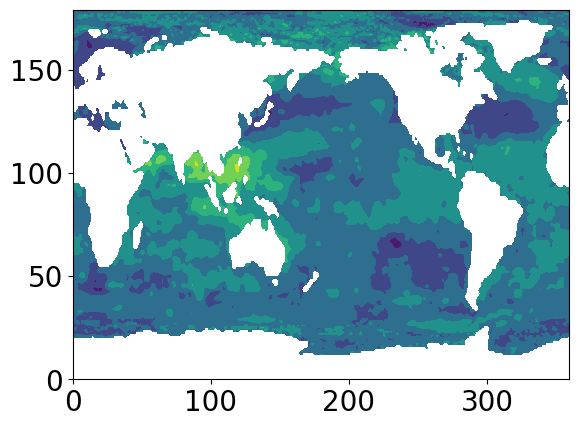

In [19]:
plt.contourf(cor_map2[0,:,:])

## Wind 

In [15]:
f    = xr.open_dataset("/scratch/cccr/roxy/panini/DATA/uwnd/uwnd.mon.mean.jjas.yearmean.1901_2015.nc")
ds1  = f.sel(level=slice(1000,700)).mean(dim=['level'])
# ds1

In [16]:
f    = xr.open_dataset("/scratch/cccr/roxy/panini/DATA/uwnd/uwnd.mon.mean.jjas.yearmean.1901_2015.nc")
ds1  = f.sel(level=(850))
# ds1

In [17]:
from scipy import signal
# data1    = "/scratch/cccr/roxy/panini/saranya/DATA_all/20th centuary_wind_monthly/uwnd.mon.mean.jjas.yearmean.1901_2015.700.nc"
# ds1      =  xr.open_dataset(data1)
uwnd     =  ds1.uwnd.values.squeeze()
data_f   =  ds1.copy()
lon      =  data_f.lon
lat      =  data_f.lat

shape             =  [1,uwnd.shape[1],uwnd.shape[2]]
regress_map1_u    =  np.zeros((shape))
cor_map1_u        =  np.zeros((shape))
significant_map_u =  np.zeros((shape))

 
for i in range(uwnd.shape[2]):
    for j in range(uwnd.shape[1]): 
        temp1= uwnd[:,j,i]
        if np.all(np.isnan(temp1)):
            regress_map1_u[0,j,i]= np.nan
            cor_map1_u[0,j,i]    = np.nan
        else:
            temp1 = signal.detrend(temp1)
            slope1,intercept1,corr1,p1,serr1 = stats.linregress(pc1[:-3],temp1)
            regress_map1_u[0,j,i]= slope1
            cor_map1_u[0,j,i]    = corr1
            significant_map_u[0,j,i] = p1
               


shape            = [1,uwnd.shape[1],uwnd.shape[2]]
regress_map2_u     = np.zeros((shape))
cor_map2_u         = np.zeros((shape))
significant_map2_u = np.zeros((shape))

 
for i in range(uwnd.shape[2]):
    for j in range(uwnd.shape[1]): 
        temp2= uwnd[:,j,i]
        if np.all(np.isnan(temp2)):
            regress_map2_u[0,j,i]= np.nan
            cor_map2_u[0,j,i]    = np.nan
        else:
            temp2 = signal.detrend(temp2)
            slope2,intercept2,corr2,p2,serr2 = stats.linregress(pc2[:-3],temp2)
            regress_map2_u[0,j,i]      = slope2
            cor_map2_u[0,j,i]          = corr2
            significant_map2_u[0,j,i]  = p2
               


In [18]:
f    = xr.open_dataset("/scratch/cccr/roxy/panini/DATA/vwnd/vwnd.mon.mean.jjas.yearmean.1901_2015.nc")
# ds1  = f.sel(level=slice(1000,700)).mean(dim=['level'])
ds1=f.sel(level=(850))

In [19]:
from scipy import signal
# data1  = "/scratch/cccr/roxy/panini/saranya/DATA_all/20th centuary_wind_monthly/vwnd.mon.mean.jjas.yearmean.1901_2015.700.nc"
# ds1     = xr.open_dataset(data1)
vwnd     =  ds1.vwnd.values.squeeze()

data_f = ds1.copy()
lon_v = data_f.lon.values
lat_v = data_f.lat.values

shape = [1,ds1.vwnd.shape[1],ds1.vwnd.shape[2]]
regress_map1_v = np.zeros((shape))
cor_map1_v = np.zeros((shape))
significant_map_v =np.zeros((shape))

 
for i in range(vwnd.shape[2]):
    for j in range(vwnd.shape[1]): 
        temp1= vwnd[:,j,i]
        if np.all(np.isnan(temp1)):
            regress_map1_v[0,j,i]= np.nan
            cor_map1_v[0,j,i]    = np.nan
        else:
            temp1 = signal.detrend(temp1)
            slope1,intercept1,corr1,p1,serr1 = stats.linregress(pc1[:-3],temp1)
            regress_map1_v[0,j,i]= slope1
            cor_map1_v[0,j,i]    = corr1
            significant_map_v[0,j,i] = p1
               


shape = [1,ds1.vwnd.shape[1],ds1.vwnd.shape[2]]
regress_map2_v = np.zeros((shape))
cor_map2_v = np.zeros((shape))
significant_map2_v =np.zeros((shape))

 
for i in range(vwnd.shape[2]):
    for j in range(vwnd.shape[1]): 
        temp2= vwnd[:,j,i]
        if np.all(np.isnan(temp2)):
            regress_map2_v[0,j,i]= np.nan
            cor_map2_v[0,j,i]    = np.nan
        else:
            temp2 = signal.detrend(temp2)
            slope2,intercept2,corr2,p2,serr2 = stats.linregress(pc2[:-3],temp2)
            regress_map2_v[0,j,i]= slope2
            cor_map2_v[0,j,i]    = corr2
            significant_map2_v[0,j,i] = p2
               


In [20]:
%store cor_map1_u
%store cor_map1_v
%store cor_map2_u
%store cor_map2_v
%store lat_v
%store lon_v

Stored 'cor_map1_u' (ndarray)
Stored 'cor_map1_v' (ndarray)
Stored 'cor_map2_u' (ndarray)
Stored 'cor_map2_v' (ndarray)
Stored 'lat_v' (ndarray)
Stored 'lon_v' (ndarray)


## geopotential height

In [21]:
lon.shape

(360,)

## OMEGA

In [23]:
from scipy import signal
datao  = "/scratch/cccr/roxy/panini/DATA/omega/omega.mon.mean.jjas.yearmean.1901_2015.500.nc"
do1     = xr.open_dataset(datao)
omg     =  do1.omega.values.squeeze()

data_f = do1.copy()
lon_o = data_f.lon.values
lat_o = data_f.lat.values

shape = [1,do1.omega.shape[2],do1.omega.shape[3]]
regress_map1_o = np.zeros((shape))
cor_map1_o = np.zeros((shape))
significant_map_o =np.zeros((shape))

 
for i in range(omg.shape[2]):
    for j in range(omg.shape[1]): 
        temp1= omg[:,j,i]
        if np.all(np.isnan(temp1)):
            regress_map1_o[0,j,i]= np.nan
            cor_map1_o[0,j,i]    = np.nan
        else:
            temp1 = signal.detrend(temp1)
            slope1,intercept1,corr1,p1,serr1 = stats.linregress(pc1[:-3],temp1)
            regress_map1_o[0,j,i]= slope1
            cor_map1_o[0,j,i]    = corr1
            significant_map_o[0,j,i] = p1
               


shape = [1,do1.omega.shape[2],do1.omega.shape[3]]
regress_map2_o = np.zeros((shape))
cor_map2_o = np.zeros((shape))
significant_map2_o =np.zeros((shape))

 
for i in range(omg.shape[2]):
    for j in range(omg.shape[1]): 
        temp2= omg[:,j,i]
        if np.all(np.isnan(temp2)):
            regress_map2_o[0,j,i]= np.nan
            cor_map2_o[0,j,i]    = np.nan
        else:
            temp2 = signal.detrend(temp2)
            slope2,intercept2,corr2,p2,serr2 = stats.linregress(pc2[:-3],temp2)
            regress_map2_o[0,j,i]= slope2
            cor_map2_o[0,j,i]    = corr2
            significant_map2_o[0,j,i] = p2
               


In [ ]:
proj=ccrs.PlateCarree(central_longitude=180.0)
fig, axiom = plt.subplots(1, 2, subplot_kw=dict(projection=proj),figsize=(20,8))
plotted=axiom[0].contourf(lon_o, lat_o, 1*cor_map1_o.squeeze(), cmap=cmap1,  levels=np.arange(-0.60,0.62,0.02), extend='both',transform = ccrs.PlateCarree())
qui1 = axiom[0].quiver(lon[::4],lat[::4],1*cor_map1_u[0,::4,::4],1*cor_map1_v[0,::4,::4], width=0.003,
                  scale=1 / 0.063,color='black', transform = ccrs.PlateCarree())
axiom[0].quiverkey(qui1, 0.15, 1.006, 1, '1 m/s',labelpos='E',fontproperties={'weight': 'bold'})
plotted=axiom[1].contourf(lon_o, lat_o, 1*cor_map2_o.squeeze(), cmap=cmap1,  levels=np.arange(-0.60,0.62,0.02), extend='both',transform = ccrs.PlateCarree())

qui2 = axiom[1].quiver(lon[::4],lat[::4],1*cor_map2_u[0,::4,::4],1*cor_map2_v[0,::4,::4], width=0.003,
                   scale=1 / 0.12,color='black', transform = ccrs.PlateCarree())
axiom[1].quiverkey(qui2, 0.15, 1.006, 1, '1 m/s',labelpos='E',fontproperties={'weight': 'bold'})


for i in range(2):
    fname='/home/cccr/roxy/panini/yang/era5_yang/Shape_file/India_Country_dcml_dgr.shp'
    shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none',edgecolor='k')
    axiom[i].add_feature(shape_feature)
    extent = [30, 150, -30, 30]
    axiom[i].set_extent(extent)
    axiom[i].set_xticks([30,  50, 70,  90,  110, 130,  150], crs=ccrs.PlateCarree())
    axiom[i].set_yticks([-30, -20,  -10, 0,  10,  20,  30], crs=ccrs.PlateCarree())

    axiom[i].coastlines()
    axiom[i].gridlines()
    axiom[i].set_aspect('equal')
    axiom[i].set_ylabel('Latitude[degree_north]',fontsize=12)
    axiom[i].set_xlabel('Longitude[degree_east]',fontsize=12)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    axiom[i].xaxis.set_major_formatter(lon_formatter)
    axiom[i].yaxis.set_major_formatter(lat_formatter)
    axiom[i].tick_params(labelsize=20)
fig.subplots_adjust(right=0.87)
cax = fig.add_axes([0.9, 0.16, 0.01, 0.7])
fig.colorbar(plotted, cax=cax,label='Correlation coefficient')
# plt.savefig("/home/cccr/roxy/saranya/MHW_saranya/figures_150dpi/wind_omg_pinas.png", bbox_inches='tight', pad_inches=0.5, dpi=150)
plt.show()

/home/cccr/roxy/panini/anaconda3/envs/jgrjdm1/lib/python3.10/site-packages/cartopy/crs.py:529: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  warnings.warn('Some vectors at source domain corners '


In [ ]:
%store cor_map1_o
%store cor_map2_o
%store lat_o
%store  lon_o